In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# hay un total de 714 filas y 7 columnas, de las cuales 3 tienen valores nulos. En total hay 177 valores nulos en la columna "age", 687 en la columna "deck" 
# ,2 en la columna "embakerd" y por igual en la columna embark_town.
# Se eliminarán las filas con valores nulos en la columna "embark_town" y "embarked", y se rellenarán los valores nulos de la columna "age" con la media de la columna.    

In [15]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [17]:
df['age'].fillna(df['age'].mean(), inplace=True)


In [52]:
df.dropna(subset=["embark_town", "embarked"], inplace=True)
df[["embark_town", "embarked"]].dropna()

,embark_town,embarked
0,Southampton,S
1,Cherbourg,C
2,Southampton,S
3,Southampton,S
4,Southampton,S
...,...,...
886,Southampton,S
887,Southampton,S
888,Southampton,S
889,Cherbourg,C


In [19]:
df['survived'].mean()

np.float64(0.38245219347581555)

In [24]:
df.groupby('sex')['survived'].mean()

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64

In [26]:
df.groupby('class')['survived'].mean()

C:\Users\Erick J. Sarante\AppData\Local\Temp\ipykernel_16604\3821409752.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['survived'].mean()


class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

<Axes: xlabel='sex', ylabel='count'>

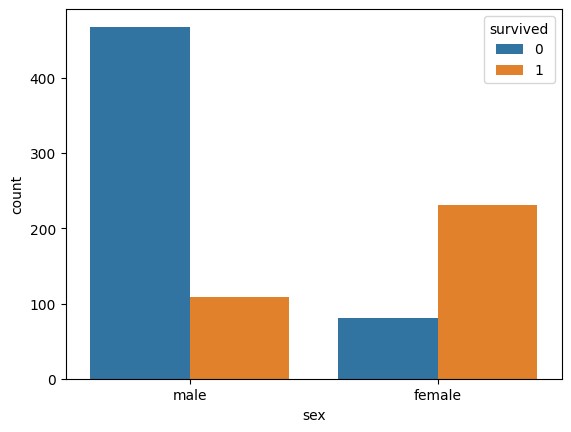

In [27]:
sns.countplot(x='sex', hue='survived', data=df)

<Axes: xlabel='age', ylabel='Count'>

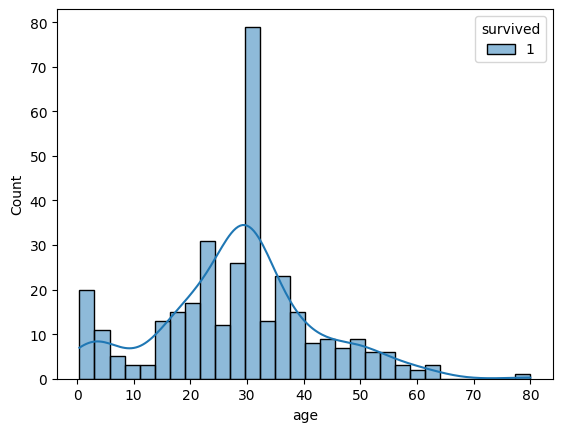

In [33]:
sns.histplot(x='age', hue='survived', data=df[df['survived']==1], bins=30, kde=True)

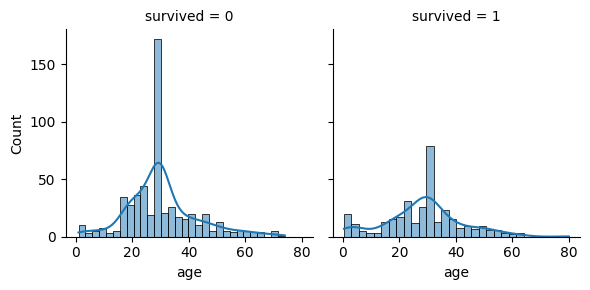

In [38]:
p = sns.FacetGrid(df, col='survived')
p.map(sns.histplot, 'age', bins=30, kde=True)

<Axes: xlabel='class', ylabel='age'>

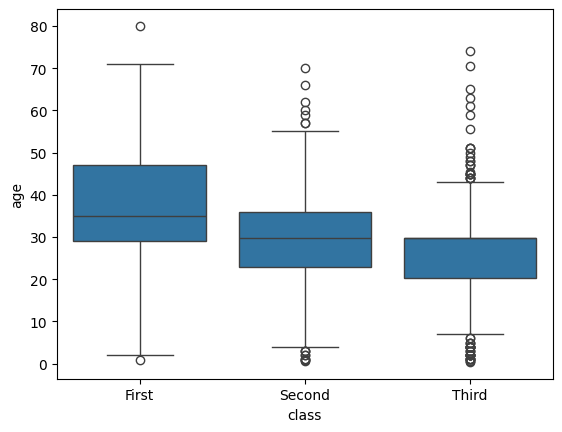

In [42]:
sns.boxplot(x='class', y='age', data=df)

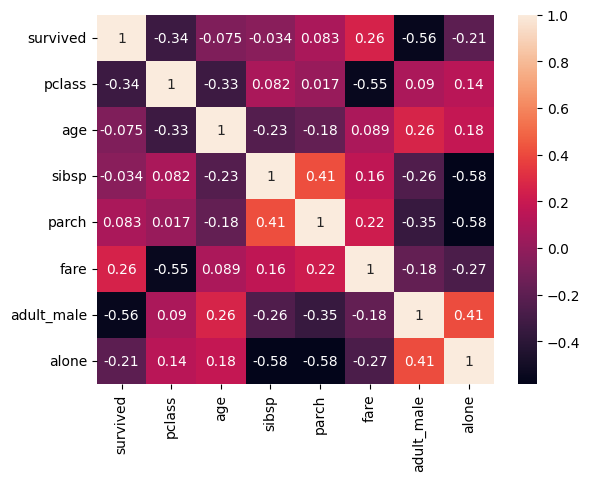

In [44]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [46]:
df['age'].mean()


np.float64(29.65344637067425)

In [47]:
df['age'].median()


np.float64(29.69911764705882)

In [48]:
df['age'].std()

np.float64(12.96836630925232)